# Chapter 1: GemPy Basic

In this first example, we will show how to construct a first basic model and the main objects and functions. First we import gempy:

In [1]:
# These two lines are necessary only if gempy is not installed
import sys, os
sys.path.append("../")


# Importing gempy
import gempy as gp

# Embedding matplotlib figures into the notebooks
%matplotlib inline

# Aux imports
import numpy as np

../gempy/UncertaintyAnalysisPYMC2.py:15: UserWarning: tqdm package not installed. No support for dynamic progress bars.
  warnings.warn("tqdm package not installed. No support for dynamic progress bars.")


In [2]:
# Importing the data from csv files and settign extent and resolution
geo_data = gp.create_data([0,2000,0,2000,-2000,0],[ 100,100,100],
                          path_f = os.pardir+"/input_data/FabLessPoints_Foliations.csv", 
                          path_i = os.pardir+"/input_data/FabLessPoints_Points.csv")

In [3]:
# Assigning series to formations as well as their order (timewise)
gp.set_series(geo_data, {"fault":'MainFault', 
                      "Rest": ('SecondaryReservoir','Seal', 'Reservoir', 'Overlying')},
                       order_series = ["fault", 'Rest'],
                       order_formations=['MainFault', 
                                         'SecondaryReservoir', 'Seal','Reservoir', 'Overlying',
                                         ], verbose=0) 

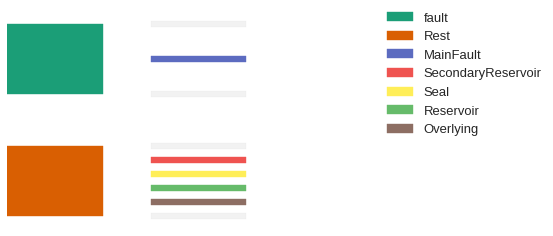

In [4]:
%matplotlib inline
gp.get_sequential_pile(geo_data)

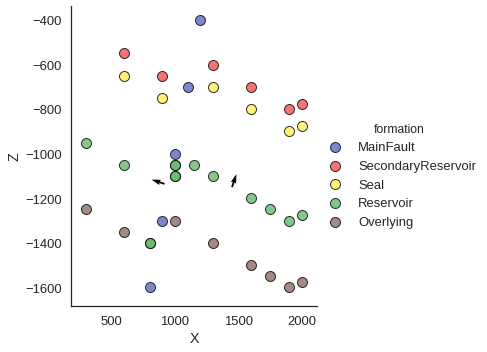

In [5]:
%matplotlib inline
gp.plot_data(geo_data, direction='y')

In [6]:
interp_data = gp.InterpolatorInput(geo_data, u_grade=[3,3])
print(interp_data)

WARNING (theano.tensor.blas): We did not found a dynamic library into the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


Level of Optimization:  fast_run
Device:  cpu
Precision:  float32


In [7]:
import copy
#init = copy.deepcopy(interp_data.geo_data_res)

In [8]:
#interp_data.geo_data_res = init

In [9]:
lith_block, fault_block = gp.compute_model(interp_data)

In [10]:
 # Testing the uncertainty
np.ones_like(interp_data.geo_data_res.interfaces['Z'])*0.01* np.random.choice([-1,1],size = interp_data.geo_data_res.interfaces['Z'].shape[0] )

array([0.01, 0.01, 0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01,
       0.01, 0.01, -0.01, 0.01, -0.01, -0.01, 0.01, -0.01, 0.01, -0.01,
       -0.01, -0.01, -0.01, -0.01, 0.01, -0.01, -0.01, 0.01, -0.01, -0.01,
       -0.01, 0.01, 0.01, -0.01, 0.01, 0.01, 0.01, 0.01, -0.01], dtype=object)

In [15]:
import matplotlib.pyplot as plt

# Lists for probability and ploting vertices
lith_list = np.zeros((0, lith_block[0].shape[-1]), dtype='int')
vertices_list = []
for i in range(2):
    
    # Changing the interp
    interp_data.geo_data_res.interfaces['Z'] = interp_data.geo_data_res.interfaces['Z'] + \
                                             np.ones_like(interp_data.geo_data_res.interfaces['Z'])*0.001* np.random.choice([-1,1],
                                             size = interp_data.geo_data_res.interfaces['Z'].shape[0] )
    # Compute
    lith_block, fault_block = gp.compute_model(interp_data)
    
    # Vertices
    ver, sim = gp.get_surfaces(interp_data,lith_block[1], fault_block[1], original_scale=True)
    
    lith_list = np.vstack((lith_list,lith_block[0]))
    vertices_list.append(ver)
    
    # Exporting both lith block and surfaces. name goes after path: This is because of how paraview reads numbers to define frames
    gp.export_to_vtk(geo_data, path='./vtks/', name='m'+str(i), lith_block=lith_block[0], vertices=ver,
                    simplices=sim)
   

In [13]:
from evtk.hl import gridToVTK

## Real time

This resolution is going to be a bit too laggy for the compute while moving method

In [81]:
lith_block, fault_block = gp.compute_model(interp_data)

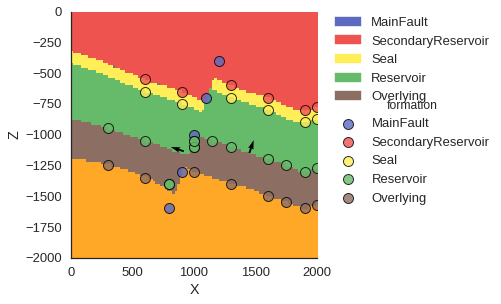

In [15]:
%matplotlib inline
gp.plot_section(geo_data, lith_block[0], 50, plot_data=True)

In [82]:
ver_s, sim_s = gp.get_surfaces(interp_data,lith_block[1],
                               fault_block[1],
                               original_scale=False)

In [83]:
gp.plot_surfaces_3D_real_time(interp_data, ver_s, sim_s)

# 2D plots

In [33]:
 ver, sim = gp.get_surfaces(interp_data,lith_block[1], fault_block[1], original_scale=True)

In [19]:
# Some plotting options
params = {
    'axes.labelsize': 6,
    'font.size': 6,
    'legend.fontsize': 10,
    'xtick.labelsize': 6,
    'ytick.labelsize': 6,
    'text.usetex': False,
    "axes.linewidth": 0.75,
    'xtick.major.size': 2,
    'xtick.major.width': 0.75,
    'ytick.major.size': 2,
    'ytick.major.width': 0.75,
}


def get_figsize(scale, textwidth=522, ratio=None):                      # Get this from LaTeX using \the\textwidth
    """Source: http://bkanuka.com/articles/native-latex-plots/"""
    inches_per_pt = 1.0 / 72.27                             # Convert pt to inch
    if ratio == None:
        ratio = (np.sqrt(5.0)-1.0)/2.0                    # Aesthetic ratio (you could change this)
    fig_width = textwidth * inches_per_pt * scale           # width in inches
    fig_height = fig_width * ratio                    # height in inches
    fig_size = [fig_width, fig_height]
    return fig_size

from matplotlib import rcParams
rcParams.update(params)

In [64]:
np.sort(vertices[0][1], axis=0)

array([[  374.28569794,     0.        ,  -845.12817383],
       [  375.38459778,     0.        ,  -845.12817383],
       [  375.38459778,     0.        ,  -844.49996948],
       ..., 
       [ 1980.        ,  1980.        ,   -20.        ],
       [ 1980.        ,  1980.        ,   -20.        ],
       [ 1980.        ,  1980.        ,   -20.        ]])

In [62]:
vertices[0][1]

array([[  377.14286804,   920.        ,   -20.        ],
       [  380.        ,   920.        ,   -40.        ],
       [  380.        ,   900.        ,   -20.        ],
       ..., 
       [ 1980.        ,  1968.75      ,  -180.        ],
       [ 1980.        ,  1980.        ,  -160.        ],
       [ 1980.        ,  1980.        ,  -160.        ]])

If a layer is folded through the axis x the plt.plot go nuts!!!

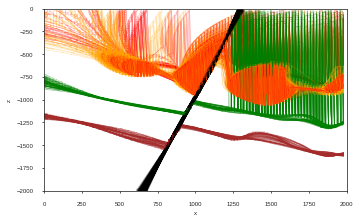

In [80]:
vertices = vertices_list

# Function to plot the traces with the vertices
def plot_iterline(i, l, color="black", lw=0.5):
   # f = vertices[i][l][:,1]==np.min(vertices[i][l][:,1])
   # f = a
    f = np.array(vertices[i][l][:,1] > 980) * np.array(vertices[i][l][:,1] < 1020)
    points = vertices[i][l][f]
    plt.plot(points[::1,0], points[::1,2], '-',
             #linestyle="solid",
             linewidth=lw, color=color, alpha=0.3)

fig = plt.figure(figsize=get_figsize(0.75))
ax = plt.subplot()
    
for i in range(0,100):
    plot_iterline(i, 4, color="brown")
    plot_iterline(i, 3, color="green")
    plot_iterline(i, 2, color="orange")
    plot_iterline(i, 1, color="red")
    plot_iterline(i, 0, color="black", lw=2)
    
ax.set_xlabel("x")

plt.ylabel("z")
plt.xlim(0,2000)

plt.ylim(-2000,-0)

plt.grid(False)

### Prob

In [71]:
import gempy.UncertaintyAnalysisPYMC2 as uq
import importlib
importlib.reload(uq)

<module 'gempy.UncertaintyAnalysisPYMC2' from '../gempy/UncertaintyAnalysisPYMC2.py'>

In [74]:
p_i = uq.compute_prob_lith(lith_list)

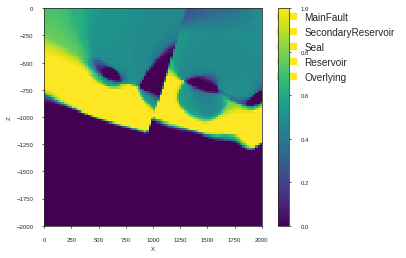

In [75]:
plot_layer = 3

gp.plot_section(geo_data,p_i[plot_layer], 50, cmap='viridis', norm=None)
plt.colorbar()

### Entropy

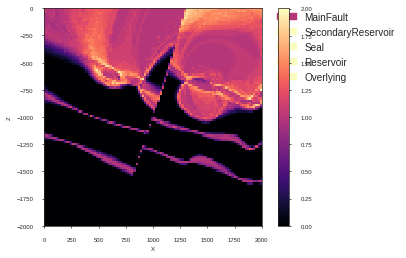

In [78]:

e = uq.calcualte_ie_masked(p_i)

gp.plot_section(geo_data,e, 50, cmap='magma', norm=None)
plt.colorbar()